In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/grbruns/cst383/master/machine.csv")
df.index = df['vendor']+' '+df['model']
df.drop(['vendor', 'model'], axis=1, inplace=True)
df['cs'] = np.round(1e3/df['myct'], 2)	# clock speed in MHz 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, adviser 32/60 to wang vs-90
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   myct    209 non-null    int64  
 1   mmin    209 non-null    int64  
 2   mmax    209 non-null    int64  
 3   cach    209 non-null    int64  
 4   chmin   209 non-null    int64  
 5   chmax   209 non-null    int64  
 6   prp     209 non-null    int64  
 7   erp     209 non-null    int64  
 8   cs      209 non-null    float64
dtypes: float64(1), int64(8)
memory usage: 16.3+ KB


In [66]:
'''
Functions
'''
def MSE(actual, predict):
    return ((predict - actual)**2).mean()

def RMSE(actual, predict):
    return np.sqrt(MSE(actual, predict))

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [69]:
# 2. From the machine data, create training and test sets, using a 70/30 split.  See the linear regression 2 slides if needed.
x = df.drop(['myct', 'prp'], axis=1).values
y = df['prp'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
y_train.shape


(146,)

In [80]:
# 3. This lab is open-ended.  I want you to experiment with building linear models using interactions and nonlinear transformations, as discussed in class.  The goal is still to predict performance (feature ‘prp’).  Start simple.
reg = LinearRegression()
# scores = -cross_val_score(reg, x_train, y_train, scoring='neg_mean_squared_error', cv=10)
# print(scores.mean())
reg.fit(x_train, y_train)
predictions = reg.predict(x_test)
MSE(y_test, predictions)


4301.840051725462

<AxesSubplot:>

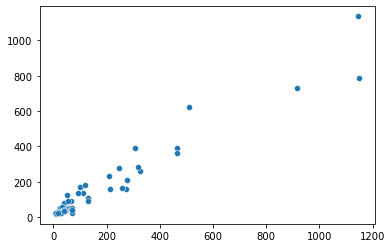

In [81]:
sns.scatterplot(y_test, predictions)

In [87]:
# pf = PolynomialFeatures(degree=3, include_bias=False)
# pf.fit(x)
# x_poly = pf.transform(x)
# # pf.get_feature_names()
# reg = LinearRegression()
# reg.fit(x_poly, y)
# print(reg.score(x_poly, y))
# RMSE(y_test, reg.predict(x_test))

0.9928867867626833


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 119 is different from 7)

degree = np.arange(0,21)
train_score, val_score = validation_curve(PolynomialRegression(), x, y, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')


In [21]:
# 4. Predict prp using your test set, and write your own code to compute the RMSE. 

In [22]:
# 5. For each experiment, I want you to pick some features, transform them in some way (or not at all), and then build a linear model using the training data.  Write down the RMSE you get on the test data.  Note: if you transform ‘prp’, you will need to account for that when you compute RMSE!

In [ ]:
# 6. See which features and transformations give you the best RMSE scores.